In [1]:
import pandas as pd

# Load the tumour dataset
tumour_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"
tumour_data = pd.read_csv(tumour_file_path)

# Load lookup tables from the Excel file
lookup_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Documents/all_z_lookup_tables.xlsx"
zstage_lookup = pd.read_excel(lookup_file_path, sheet_name="zstage")
zgrade_lookup = pd.read_excel(lookup_file_path, sheet_name="zgrade")
zbehaviour_lookup = pd.read_excel(lookup_file_path, sheet_name="zbehaviour")
    
# Map the lookup tables to the dataset
tumour_data["STAGE_BEST_DESCRIPTION"] = tumour_data["STAGE_BEST"].map(
    dict(zip(zstage_lookup["Code"], zstage_lookup["Description"]))
)
tumour_data["GRADE_DESCRIPTION"] = tumour_data["GRADE"].map(
    dict(zip(zgrade_lookup["Code"], zgrade_lookup["Description"]))
)
tumour_data["BEHAVIOUR_DESCRIPTION"] = tumour_data["BEHAVIOUR_ICD10_O2"].map(
    dict(zip(zbehaviour_lookup["Code"], zbehaviour_lookup["Description"]))
)

print("Dataset and Lookup Tables Loaded Successfully.")


C:\Users\wardo\AppData\Local\Temp\ipykernel_21264\575646805.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv(tumour_file_path)


Dataset and Lookup Tables Loaded Successfully.


In [3]:
# Display basic information about the dataset
print("Basic Information about the Tumour Dataset:")
print(tumour_data.info())

print("\nFirst Few Rows of the Tumour Dataset:")
print(tumour_data.head())


Basic Information about the Tumour Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995570 entries, 0 to 1995569
Data columns (total 40 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   TUMOURID                        int64  
 1   GENDER                          int64  
 2   PATIENTID                       int64  
 3   DIAGNOSISDATEBEST               object 
 4   SITE_ICD10_O2_3CHAR             object 
 5   SITE_ICD10_O2                   object 
 6   SITE_ICD10R4_O2_3CHAR_FROM2013  object 
 7   SITE_ICD10R4_O2_FROM2013        object 
 8   SITE_ICDO3REV2011               object 
 9   SITE_ICDO3REV2011_3CHAR         object 
 10  MORPH_ICD10_O2                  int64  
 11  MORPH_ICDO3REV2011              float64
 12  BEHAVIOUR_ICD10_O2              int64  
 13  BEHAVIOUR_ICDO3REV2011          int64  
 14  T_BEST                          object 
 15  N_BEST                          object 
 16  M_BEST                      


Distribution of Tumour Stages:
STAGE_BEST_DESCRIPTION
INSUFFICIENT INFO    686411
4                    178064
1                    151812
UNSTAGEABLE          125132
3                     99470
2                     82359
0                     61003
5                        19
X NOT STAGED              1
Name: count, dtype: int64


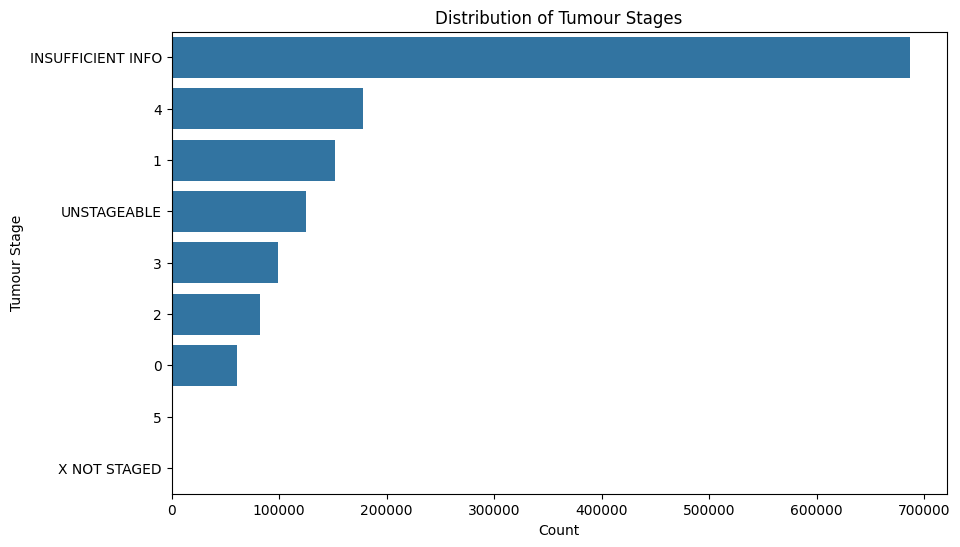

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: Distribution of Tumour Stages
print("\nDistribution of Tumour Stages:")
print(tumour_data["STAGE_BEST_DESCRIPTION"].value_counts())

# Plot the distribution of tumour stages
plt.figure(figsize=(10, 6))
sns.countplot(y="STAGE_BEST_DESCRIPTION", data=tumour_data, order=tumour_data["STAGE_BEST_DESCRIPTION"].value_counts().index)
plt.title("Distribution of Tumour Stages")
plt.xlabel("Count")
plt.ylabel("Tumour Stage")
plt.show()


In [32]:
try:
    # Inspect the original GRADE column
    print("First few rows of the original GRADE column:")
    print(tumour_data["GRADE"].head())

    # Check for missing and unique values in GRADE
    print("\nMissing values in GRADE column:")
    print(tumour_data["GRADE"].isnull().sum())

    print("\nUnique values in GRADE column:")
    print(tumour_data["GRADE"].unique())

    # Handle missing values
    tumour_data["GRADE"] = tumour_data["GRADE"].fillna("Unknown")

    # Clean the GRADE column by removing the starting "G"
    tumour_data["GRADE_CLEANED"] = tumour_data["GRADE"].astype(str).str.replace("^G", "", regex=True)

    # Verify the cleaned GRADE values
    print("\nFirst few cleaned GRADE values:")
    print(tumour_data["GRADE_CLEANED"].head())

except Exception as e:
    print(f"An error occurred: {str(e)}")


First few rows of the original GRADE column:
0    nan
1    nan
2    nan
3    nan
4    nan
Name: GRADE, dtype: object

Missing values in GRADE column:
0

Unique values in GRADE column:
['nan']

First few cleaned GRADE values:
0    nan
1    nan
2    nan
3    nan
4    nan
Name: GRADE_CLEANED, dtype: object



Distribution of Tumour Behaviour:
BEHAVIOUR_DESCRIPTION
MALIGNANT                                             1741769
IN SITU                                                174318
UNCERTAIN                                               47790
BENIGN                                                  18405
MALIGNANT, METASTATIC/ SECONDARY SITE                   10032
MICRO-INVASIVE                                           2803
MALIGNANT, UNCERTAIN WHETHER PRIMARY OR METASTATIC        453
Name: count, dtype: int64


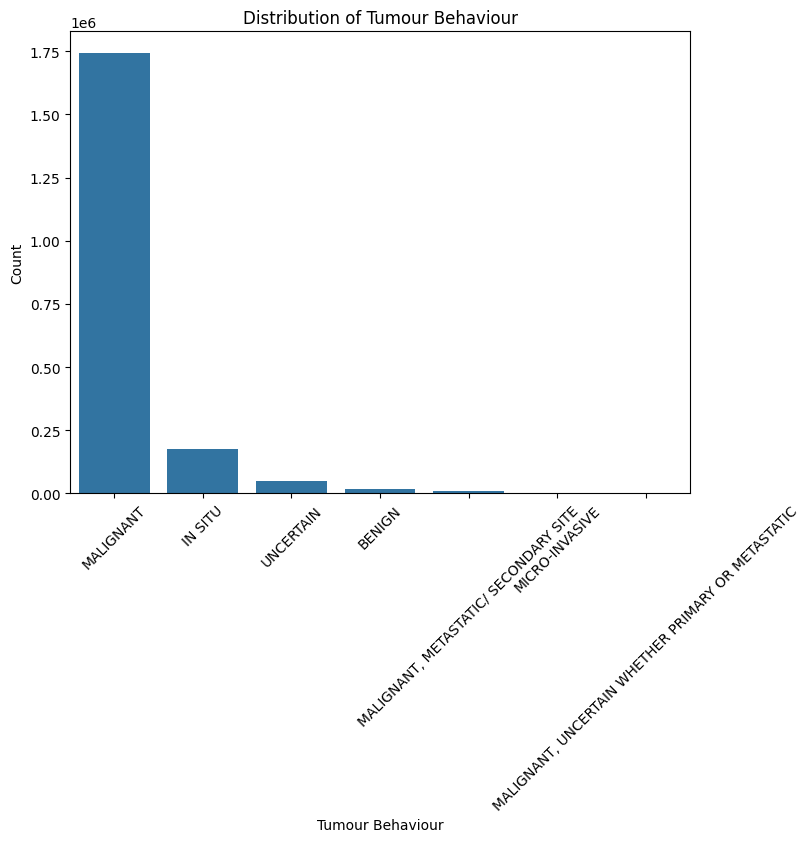

In [6]:
# EDA: Tumour Behaviour
print("\nDistribution of Tumour Behaviour:")
print(tumour_data["BEHAVIOUR_DESCRIPTION"].value_counts())

# Plot the distribution of tumour behaviour
plt.figure(figsize=(8, 6))
sns.countplot(x="BEHAVIOUR_DESCRIPTION", data=tumour_data, order=tumour_data["BEHAVIOUR_DESCRIPTION"].value_counts().index)
plt.title("Distribution of Tumour Behaviour")
plt.xlabel("Tumour Behaviour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


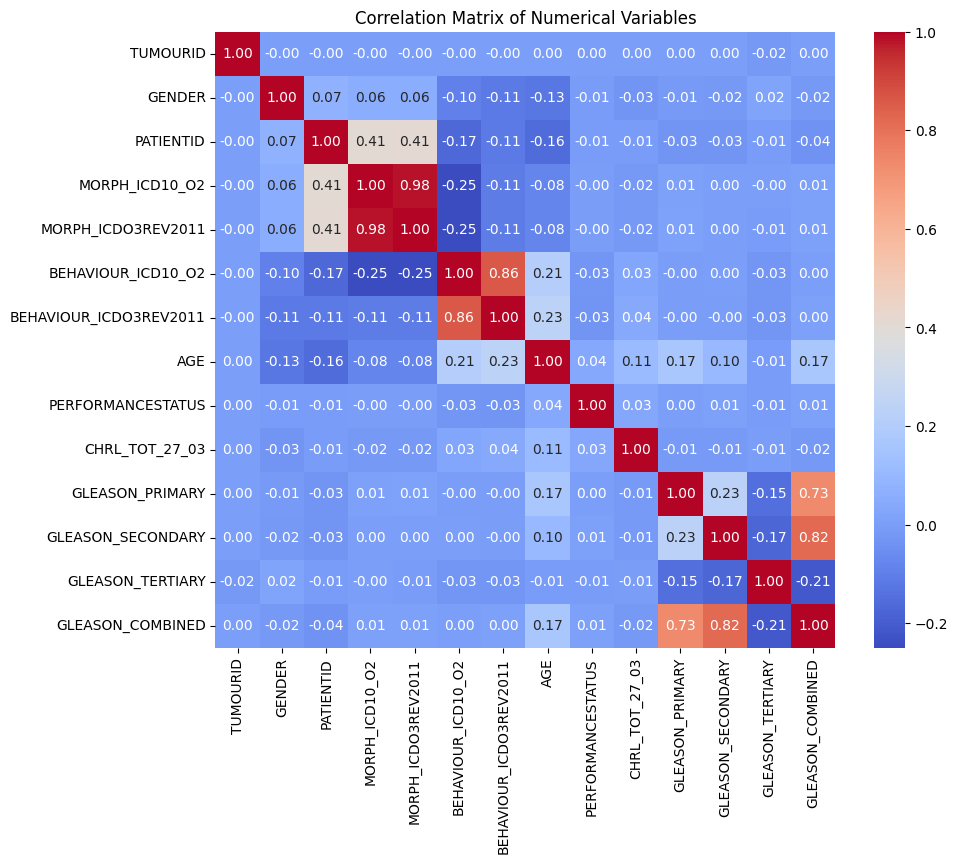

In [7]:
# Correlation Analysis (if numerical columns are present)
numerical_columns = tumour_data.select_dtypes(include=["number"]).columns
if len(numerical_columns) > 1:
    correlation_matrix = tumour_data[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix of Numerical Variables")
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")


In [11]:
# Group-level analysis by tumour stage
try:
    # Identify numerical columns (ignore non-numeric ones)
    numerical_columns = tumour_data.select_dtypes(include=["number"]).columns.tolist()

    # Attempt to convert remaining columns to numeric if possible
    for col in tumour_data.columns:
        if col not in numerical_columns:
            try:
                tumour_data[col] = pd.to_numeric(tumour_data[col], errors="coerce")
                numerical_columns.append(col)
            except Exception:
                pass

    # Perform group-level analysis if STAGE_BEST_DESCRIPTION exists
    if "STAGE_BEST_DESCRIPTION" in tumour_data.columns:
        stage_summary = tumour_data.groupby("STAGE_BEST_DESCRIPTION")[numerical_columns].mean()
        print("\nGroup-Level Statistics by Tumour Stage:")
        print(stage_summary)
    else:
        print("STAGE_BEST_DESCRIPTION column not found in the dataset.")
except Exception as e:
    print(f"An error occurred during group-level analysis: {str(e)}")



Group-Level Statistics by Tumour Stage:
                            TUMOURID    GENDER     PATIENTID  MORPH_ICD10_O2  \
STAGE_BEST_DESCRIPTION                                                         
0.0                     1.100217e+07  1.761815  5.386092e+07     8323.401669   
1.0                     1.100061e+07  1.257107  5.381090e+07     8290.331219   
2.0                     1.099995e+07  1.293532  5.124546e+07     8333.303476   
3.0                     1.099957e+07  1.262461  5.049881e+07     8339.248859   
4.0                     1.099967e+07  1.393426  5.502890e+07     8357.366756   
5.0                     1.113471e+07  1.315789  8.001759e+07     8294.315789   

                        MORPH_ICDO3REV2011  BEHAVIOUR_ICD10_O2  \
STAGE_BEST_DESCRIPTION                                           
0.0                            8325.470010            1.977640   
1.0                            8291.574168            2.989421   
2.0                            8334.051640            